In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [2]:
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance.csv')
data['devicetime'] = pd.to_datetime(data['devicetime'])
bus_trips = pd.read_csv("../DataOut/bus_trips.csv")

In [3]:
# Draw a line graph of radial acceleration against time for a single trip
def drawAgainst(trip_id,columnx,columny):
    trip_df = data[data["trip_id"] == trip_id]
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(trip_df[f"{columnx}"], trip_df[f"{columny}"])
    plt.xlabel(f"{columnx}")
    plt.ylabel(f"{columny}")
    plt.title("Trip " + str(trip_id))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout for better formatting
    plt.show()


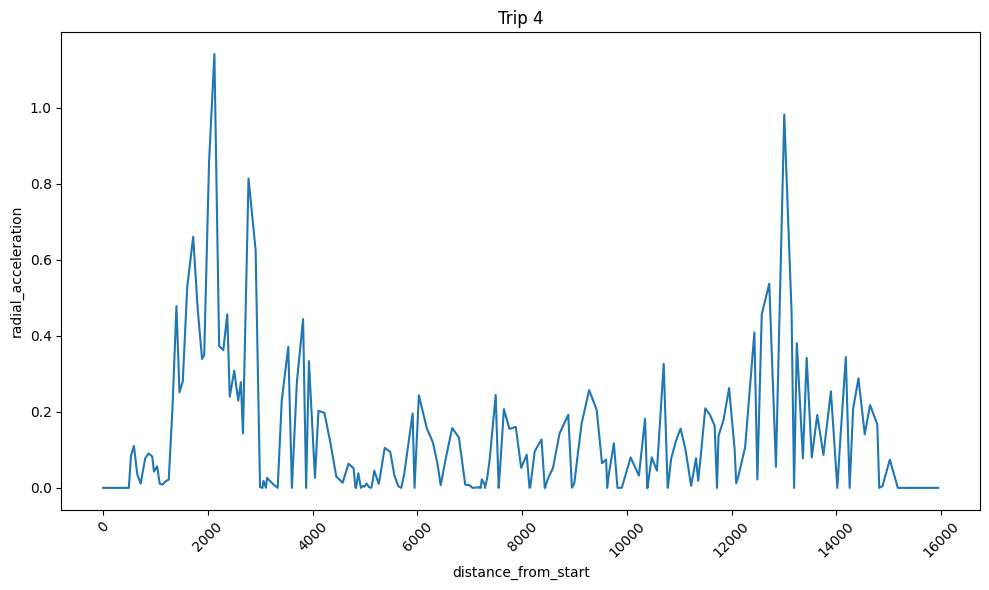

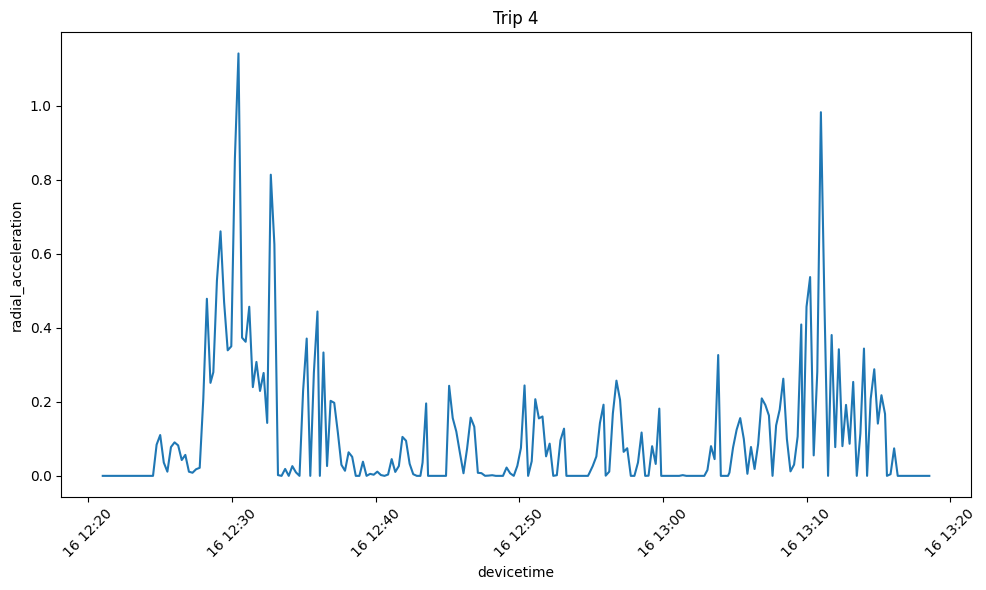

In [4]:
drawAgainst(4,'distance_from_start','radial_acceleration')
drawAgainst(4 , 'devicetime', 'radial_acceleration')

# Clustering


In [5]:
datain_one_direction=data[data['direction']==1]
data_to_cluster=datain_one_direction[['deviceid','speed','acceleration','radial_acceleration']]

In [6]:
grouped_by_trip_id = datain_one_direction.groupby('trip_id')

#get number of rows in each trip
trip_id_count = grouped_by_trip_id['trip_id'].count()

(array([ 2.,  3.,  2.,  4.,  4.,  8.,  3.,  2.,  2.,  3.,  5.,  4.,  6.,
         4.,  7.,  6.,  7., 10.,  4., 13., 14., 17., 24., 36., 44., 44.,
        55., 46., 68., 51., 47., 31., 19., 22., 16., 12.,  8.,  4.,  3.,
         5.,  1.,  1.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 96.  , 100.63, 105.26, 109.89, 114.52, 119.15, 123.78, 128.41,
        133.04, 137.67, 142.3 , 146.93, 151.56, 156.19, 160.82, 165.45,
        170.08, 174.71, 179.34, 183.97, 188.6 , 193.23, 197.86, 202.49,
        207.12, 211.75, 216.38, 221.01, 225.64, 230.27, 234.9 , 239.53,
        244.16, 248.79, 253.42, 258.05, 262.68, 267.31, 271.94, 276.57,
        281.2 , 285.83, 290.46, 295.09, 299.72, 304.35, 308.98, 313.61,
  

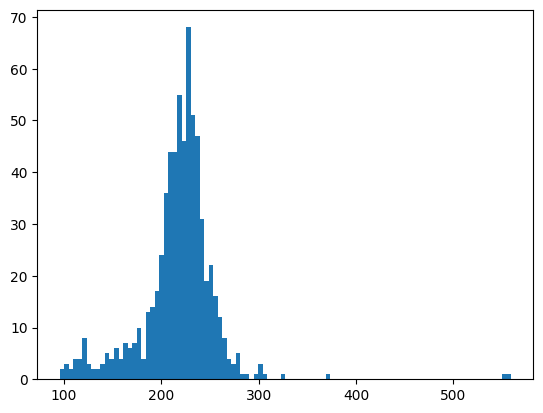

In [7]:

plt.hist(trip_id_count, bins=100)

In [8]:
#import trendypy as Trendy

In [9]:
data_in_one_direction = data[data['direction'] == 1]


,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration,distance_from_start
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975,0.0,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980,0.0,123.738485
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987,0.0,163.044397
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980,0.0,211.472339
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,0.0,287.492821


In [19]:

from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from tslearn.utils import to_time_series_dataset

In [11]:
#added distance from start to columns to scale

from sklearn.preprocessing import StandardScaler

# Create empty lists to store trip IDs and dataframes
processed_trip_ids = []
dataframes_without_trip_id = []
data = data_in_one_direction
# Iterate through each unique trip_id
for trip_id in data['trip_id'].unique():
    # Filter the data for the current trip_id
    trip_data = data[data['trip_id'] == trip_id].copy()
    
    # Remove the trip_id column from the current trip_data
    trip_data_without_id = trip_data[['distance_from_start', 'radial_acceleration']]
    
    # Ensure selected columns are numeric (e.g., exclude any object or string columns)
    numeric_columns = [ 'distance_from_start', 'radial_acceleration']
    trip_data_without_id = trip_data_without_id[numeric_columns].astype(float)  # Convert to float data type
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    columns_to_scale = ['radial_acceleration','distance_from_start']

    # Fit and transform the selected columns
    trip_data_without_id[columns_to_scale] = scaler.fit_transform(trip_data_without_id[columns_to_scale])
    
    # Append the trip_id to the list
    processed_trip_ids.append(trip_id)
    
    # Append the dataframe without trip_id to the list
    dataframes_without_trip_id.append(trip_data_without_id)




In [15]:
dataframes_array = []
# loop through every df in dataframes_without_trip_id
for df in dataframes_without_trip_id:
    # Convert DataFrame to NumPy array
    numpy_array = df.values
    dataframes_array.append(numpy_array)


In [20]:
X = to_time_series_dataset(dataframes_array)

In [22]:
cluster_count = 6
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(X)

KeyboardInterrupt: 

In [25]:
from joblib import load

# Load the model from the file
model = load('model.joblib')

In [ ]:
## performDBA function



'''
/*******************************************************************************
 * Copyright (C) 2018 Francois Petitjean
 *
 * This program is free software: you can redistribute it and/or modify
 * it under the terms of the GNU General Public License as published by
 * the Free Software Foundation, version 3 of the License.
 *
 * This program is distributed in the hope that it will be useful,
 * but WITHOUT ANY WARRANTY; without even the implied warranty of
 * MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 * GNU General Public License for more details.
 *
 * You should have received a copy of the GNU General Public License
 * along with this program.  If not, see <http://www.gnu.org/licenses/>.
 ******************************************************************************/
'''
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce


__author__ ="Francois Petitjean"

def performDBA(series, n_iterations=10):
    n_series = len(series)
    max_length = 0
    for s in series:
        max_length = max(max_length,s.shape[1])

    cost_mat = np.zeros((max_length, max_length))
    delta_mat = np.zeros((max_length, max_length))
    tmp_delta_mat = np.zeros((max_length, max_length))
    path_mat = np.zeros((max_length, max_length), dtype=np.int8)

    medoid_ind = approximate_medoid_index(series,cost_mat,delta_mat,tmp_delta_mat)
    center = series[medoid_ind]

    for i in range(0,n_iterations):
        center = DBA_update(center, series, cost_mat, path_mat, delta_mat,tmp_delta_mat)

    return center

def approximate_medoid_index(series,cost_mat,delta_mat,tmp_delta_mat):
    if len(series)<=50:
        indices = range(0,len(series))
    else:
        indices = np.random.choice(range(0,len(series)),50,replace=False)

    medoid_ind = -1
    best_ss = 1e20
    for index_candidate in indices:
        candidate = series[index_candidate]
        ss = sum_of_squares(candidate,series,cost_mat,delta_mat,tmp_delta_mat)
        if(medoid_ind==-1 or ss<best_ss):
            best_ss = ss
            medoid_ind = index_candidate
    return medoid_ind

def sum_of_squares(s,series,cost_mat,delta_mat,tmp_delta_mat):
    return sum(map(lambda t:squared_DTW(s,t,cost_mat,delta_mat,tmp_delta_mat),series))

def DTW(s,t,cost_mat,delta_mat):
    return np.sqrt(squared_DTW(s,t,cost_mat,delta_mat))

def squared_DTW(s,t,cost_mat,delta_mat,tmp_delta_mat):
    s_len = s.shape[1]
    t_len = t.shape[1]
    fill_delta_mat_dtw(s, t, delta_mat,tmp_delta_mat)
    cost_mat[0, 0] = delta_mat[0, 0]
    for i in range(1, s_len):
        cost_mat[i, 0] = cost_mat[i-1, 0]+delta_mat[i, 0]

    for j in range(1, t_len):
        cost_mat[0, j] = cost_mat[0, j-1]+delta_mat[0, j]

    for i in range(1, s_len):
        for j in range(1, t_len):
            diag,left,top =cost_mat[i-1, j-1], cost_mat[i, j-1], cost_mat[i-1, j]
            if(diag <=left):
                if(diag<=top):
                    res = diag
                else:
                    res = top
            else:
                if(left<=top):
                    res = left
                else:
                    res = top
            cost_mat[i, j] = res+delta_mat[i, j]
    return cost_mat[s_len-1,t_len-1]

def fill_delta_mat_dtw(center, s, delta_mat, tmp_delta_mat):
    n_dims = center.shape[0]
    len_center = center.shape[1]
    len_s=  s.shape[1]
    slim = delta_mat[:len_center,:len_s]
    slim_tmp = tmp_delta_mat[:len_center,:len_s]

    #first dimension - not in the loop to avoid initialisation of delta_mat
    np.subtract.outer(center[0], s[0],out = slim)
    np.square(slim, out=slim)

    for d in range(1,center.shape[0]):
        np.subtract.outer(center[d], s[d],out = slim_tmp)
        np.square(slim_tmp, out=slim_tmp)
        np.add(slim,slim_tmp,out=slim)

    assert(np.abs(np.sum(np.square(center[:,0]-s[:,0]))-delta_mat[0,0])<=1e-6)

def DBA_update(center, series, cost_mat, path_mat, delta_mat, tmp_delta_mat):
    options_argmin = [(-1, -1), (0, -1), (-1, 0)]
    updated_center = np.zeros(center.shape)
    center_length = center.shape[1]
    n_elements = np.zeros(center_length, dtype=int)

    for s in series:
        s_len = s.shape[1]
        fill_delta_mat_dtw(center, s, delta_mat, tmp_delta_mat)
        cost_mat[0, 0] = delta_mat[0, 0]
        path_mat[0, 0] = -1

        for i in range(1, center_length):
            cost_mat[i, 0] = cost_mat[i-1, 0]+delta_mat[i, 0]
            path_mat[i, 0] = 2

        for j in range(1, s_len):
            cost_mat[0, j] = cost_mat[0, j-1]+delta_mat[0, j]
            path_mat[0, j] = 1

        for i in range(1, center_length):
            for j in range(1, s_len):
                diag,left,top =cost_mat[i-1, j-1], cost_mat[i, j-1], cost_mat[i-1, j]
                if(diag <=left):
                    if(diag<=top):
                        res = diag
                        path_mat[i,j] = 0
                    else:
                        res = top
                        path_mat[i,j] = 2
                else:
                    if(left<=top):
                        res = left
                        path_mat[i,j] = 1
                    else:
                        res = top
                        path_mat[i,j] = 2

                cost_mat[i, j] = res+delta_mat[i, j]

        i = center_length-1
        j = s_len-1

        while(path_mat[i, j] != -1):
            updated_center[:,i] += s[:,j]
            n_elements[i] += 1
            move = options_argmin[path_mat[i, j]]
            i += move[0]
            j += move[1]
        assert(i == 0 and j == 0)
        updated_center[:,i] += s[:,j]
        n_elements[i] += 1

    return np.divide(updated_center, n_elements)

# def main():
#     #generating synthetic data
#     n_series = 20
#     length = 200
#     n_dims = 201

#     print('Important note: the data should be structure "channels-first", ie the series should have shape (n_channels,length)')

#     series = list()
#     padding_length=30
#     indices = range(0, length-padding_length)
#     main_profile_gen = np.array([np.sin(2.0*np.pi*j/len(indices)) for j in indices])

#     randomizer = lambda j:np.random.normal(j,0.02)
#     randomizer_fun = np.vectorize(randomizer)
#     for i in range(0,n_series):
#         n_pad_left = np.random.randint(0,padding_length)
#         #adding zero at the start or at the end to shif the profile
#         b = n_pad_left
#         a = padding_length-n_pad_left
#         padded_pattern = np.pad(main_profile_gen,(a,b),mode='constant',constant_values=0)

#         #chop some of the end to prove it can work with multiple lengths
#         l = np.random.randint(length-20,length+1)
#         padded_pattern = padded_pattern[:l]
#         padded_pattern = randomizer_fun(padded_pattern)

#         series_i = np.zeros((n_dims,l))
#         for d in range(0,n_dims):
#             series_i[d]=padded_pattern

#         series.append(series_i)

#     #plotting the synthetic data
#     for s in series:
#         plt.plot(range(0,s.shape[1]), s[0])
#     plt.draw()
#     plt.show()

#     #calculating average series with DBA
#     average_series = performDBA(series)

#     #plotting the average series
#     plt.figure()
#     for d in range(0,n_dims):
#         plt.plot(range(0,average_series.shape[1]), average_series[d])
#     plt.show()

# if __name__== "__main__":
#     main()

In [27]:
#read csv in dataout
all_trips_data = pd.read_csv('../DataOut/all_trips_with_cluster_label.csv')

In [37]:
#start_time to datetime
all_trips_data['start_time'] = pd.to_datetime(all_trips_data['start_time'])
#start_hour fraction 
all_trips_data['start_hour'] = all_trips_data['start_time'].dt.hour + round(all_trips_data['start_time'].dt.minute/60)



In [38]:
all_trips_data_one_direction = all_trips_data[all_trips_data['direction']==1]

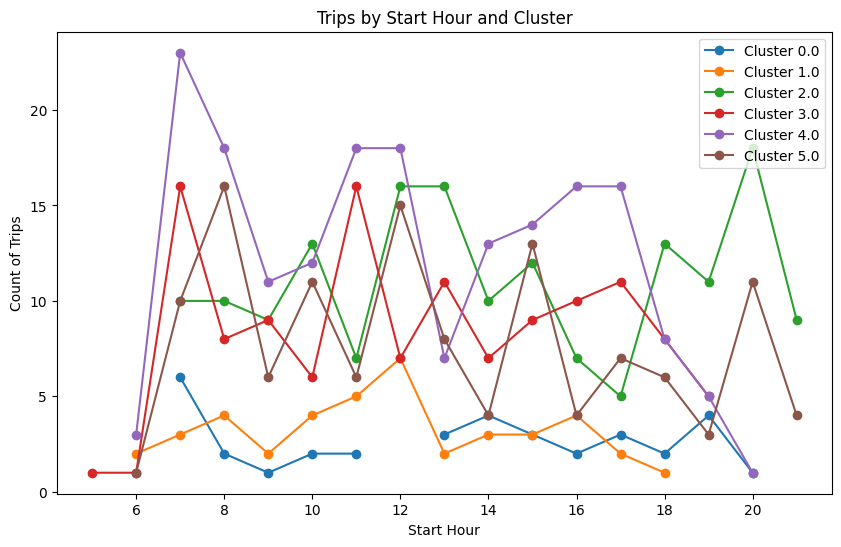

In [40]:
# Round the distance_from_start column to the nearest hundred
data['100m_segment'] = (data['distance_from_start'] // 100) 


#get trip_start_time
data['start_time'] = pd.to_datetime(data['devicetime'])data['hour_of_day'] = data['devicetime'].dt.hour

data['acceleration_category'] = 1 #medium
data.loc[data['acceleration'] > 1, 'acceleration_category'] = 2
data.loc[data['acceleration'] < -1, 'acceleration_category'] = -2
data.loc[data['acceleration'] < -2, 'acceleration_category'] = -3  #braking
data.loc[abs(data['acceleration']) < 0.2, 'acceleration_category'] = 0
# Bin the speed values into slow, medium, and fast categories
bins = [0, 0.5 , 10, 20, np.inf]
labels = [0,1,2,3] #idling , slow , medium , fast
data['speed_category'] = pd.cut(data['speed'], bins=bins, labels=labels)

In [52]:
all_trips_data_one_direction['duration_in_mins'] 

1       50.733333
3       57.800000
5       58.016667
7       51.416667
9       52.216667
          ...    
1355    55.716667
1357    43.066667
1359    48.266667
1361    56.400000
1363    54.333333
Name: duration_in_mins, Length: 676, dtype: float64

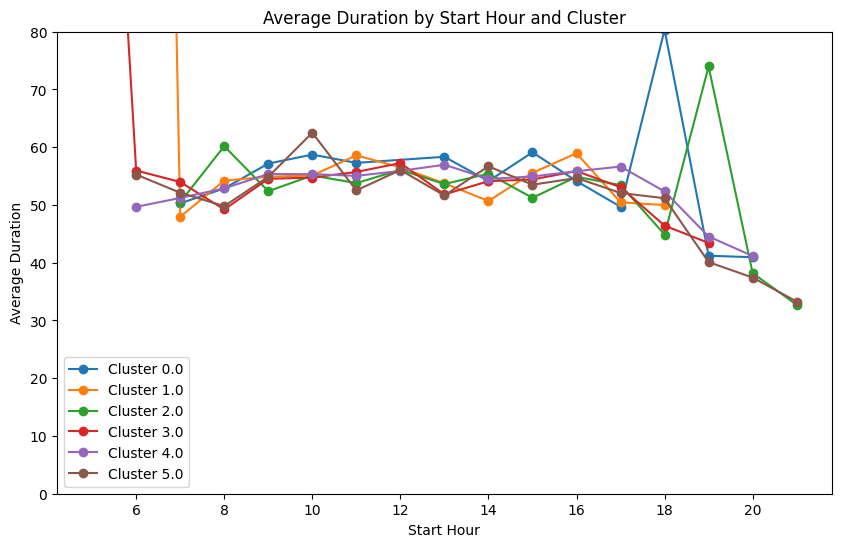

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by cluster_label and start_hour, and calculate the average duration in each group
grouped_data = all_trips_data_one_direction.groupby(['cluster_label', 'start_hour'])['duration_in_mins'].mean().reset_index(name='average_duration')

# Plot the data using a line plot with different colors for each cluster_label
fig, ax = plt.subplots(figsize=(10, 6))
for label, group in grouped_data.groupby('cluster_label'):
    group.plot(x='start_hour', y='average_duration', ax=ax, label=f'Cluster {label}', marker='o')
plt.xlabel('Start Hour')
plt.ylabel('Average Duration')
plt.title('Average Duration by Start Hour and Cluster')
plt.ylim(0, 80)
plt.legend()
plt.show()

In [43]:
#plot average speed for each cluster_label against start_hour
all_trips_data_one_direction.groupby(['cluster_label','start_hour'])['length'].mean().unstack().plot(kind='line',figsize=(10, 6))
#if acceleration is less than -2 then it is a break, (calculate breaks / length )* 16000 for each trip
data['breaks'] = data['acceleration'].apply(lambda x: 1 if x < -2 else 0)



KeyError: 'Column not found: speed'

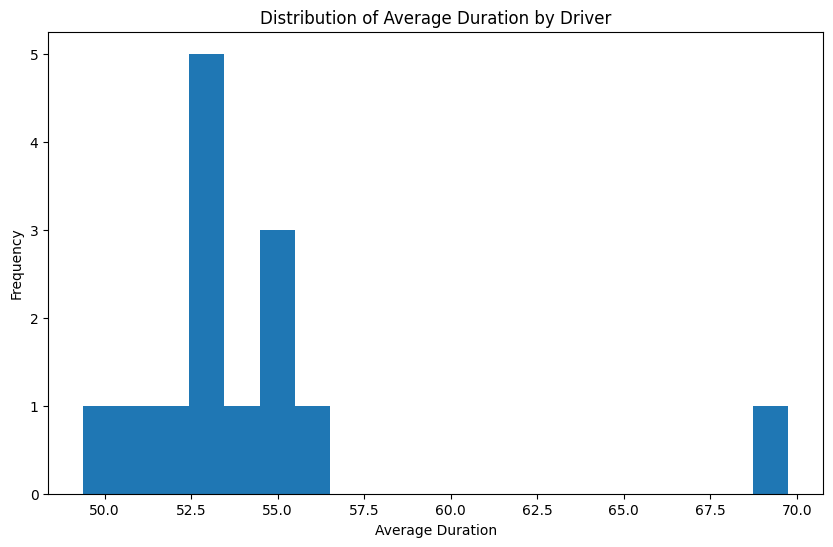

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file

# Group the data by driver and calculate the average duration for each driver
grouped_data = all_trips_data.groupby('deviceid')['duration_in_mins'].mean().reset_index(name='average_duration')

# Plot the data using a histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(grouped_data['average_duration'], bins=20)
plt.xlabel('Average Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Average Duration by Driver')
plt.show()

## Visualize bus running on map

In [ ]:
## Visulaise bus running on map

import folium
import pandas as pd
from ipywidgets import interact, IntSlider



# Convert timestamp column to datetime format
data['devicetime'] = pd.to_datetime(data['devicetime'])

data['devicetime'].min()
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")

# Get the location coordinates (latitude, longitude) for Kandy
Nattarampota_location = geolocator.geocode("Nattarampota, Sri Lanka")
Nattarampota_latitude = Nattarampota_location.latitude
Nattarampota_longitude = Nattarampota_location.longitude

print("Latitude:", Nattarampota_latitude, "Longitude:", Nattarampota_longitude)
Nattarampota_location = [Nattarampota_latitude, Nattarampota_longitude]  # Kandy city location
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")

# Get the location coordinates (latitude, longitude) for Kandy
kandy_location = geolocator.geocode("Kandy, Sri Lanka")
kandy_latitude = kandy_location.latitude
kandy_longitude = kandy_location.longitude

print("Latitude:", kandy_latitude, "Longitude:", kandy_longitude)
Kandy_location = [kandy_latitude, kandy_longitude]  # Kandy city location
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")

# Get the location coordinates (latitude, longitude) for digana
digana_location = geolocator.geocode("Digana, Sri Lanka")
digana_latitude = digana_location.latitude
digana_longitude = digana_location.longitude

print("Latitude:", digana_latitude, "Longitude:", digana_longitude)
digana_location = [digana_latitude, digana_longitude]  # Kandy city location
data.head(20)
import folium
import pandas as pd
from shapely.geometry import Point
from ipywidgets import FloatSlider, interact, Label, Output, VBox, Button, HBox

# Assuming you have 'data' DataFrame containing bus data

# Dictionary to store last known location of each bus
bus_locations = {}

# Create Point geometries for Kandy and Digana
kandy_location = Point(kandy_latitude, kandy_longitude)
digana_location = Point(digana_latitude, digana_longitude)  # Define the coordinates for Digana

def create_map():
    return folium.Map(location=Nattarampota_location, zoom_start=14)

def update_map(timestamp):
    m = create_map()  # Create a new map instance each time
    interval = pd.Timedelta(seconds=15)
    timestamp_dt = pd.Timestamp.fromtimestamp(timestamp)  # Convert timestamp to pandas Timestamp
    interval_start = timestamp_dt - interval / 2
    interval_end = timestamp_dt + interval / 2

    bus_data_within_interval = data[(data['devicetime'] >= interval_start) & (data['devicetime'] <= interval_end)]
    bus_data_within_interval = bus_data_within_interval.sort_values(by='devicetime', ascending=False)
    unique_buses = data['deviceid'].unique()

    for deviceid in unique_buses:
        latest_data_for_bus = None  # Initialize the variable here

        bus_data_for_bus = bus_data_within_interval[bus_data_within_interval['deviceid'] == deviceid]
        if len(bus_data_for_bus) > 0:
            latest_data_for_bus = bus_data_for_bus.iloc[0]
            bus_location = [latest_data_for_bus['latitude'], latest_data_for_bus['longitude']]
            bus_locations[deviceid] = bus_location
        else:
            bus_location = bus_locations.get(deviceid)

        if bus_location is not None:
            bus_point = Point(bus_location[0], bus_location[1])

            # Adjust the color using a consistent formula
            color = "#{:06x}".format(deviceid + 100000)

            # get speed acceleration and radial acceleration into three variables
            if latest_data_for_bus is not None:
                speed = latest_data_for_bus['speed']
                acceleration = latest_data_for_bus['acceleration']
                radial_acceleration = latest_data_for_bus['radial_acceleration']
                print(speed, acceleration, radial_acceleration)
            else:
                speed = 0
                acceleration = 0
                radial_acceleration = 0

            folium.Marker(
                location=bus_location,
                popup=[deviceid, speed, acceleration, radial_acceleration],
                color=color  # Use the calculated color
            ).add_to(m)

    return m

min_timestamp = data['devicetime'].min()
max_timestamp = data['devicetime'].max()

# Calculate step size in seconds
step_size_seconds = 15
slider = FloatSlider(value=min_timestamp.timestamp(), min=min_timestamp.timestamp(), max=max_timestamp.timestamp(), step=step_size_seconds)

# Adjust the length of the slider using CSS style
slider.style.handle_length = '500px'  # Adjust the length as desired

time_label = Label(value=pd.Timestamp.fromtimestamp(slider.value).strftime('%Y-%m-%d %H:%M:%S'))

def update_time_label(change):
    time_label.value = pd.Timestamp.fromtimestamp(change['new']).strftime('%Y-%m-%d %H:%M:%S')

slider.observe(update_time_label, 'value')

stop = False  # Declare stop as a global variable

# Button to stop continuous play
def stop_continuous(_):
    global stop
    stop = True
    
# Button to move slider left
def move_left(_):
    slider.value -= step_size_seconds

# Button to move slider right
def move_right(_):
    slider.value += step_size_seconds

# Button to move slider left continuously
def move_left_continuous(_):
    while slider.value > slider.min and not stop:
        slider.value -= step_size_seconds

# Button to move slider right continuously
def move_right_continuous(_):
    while slider.value < slider.max and not stop:
        slider.value += step_size_seconds





left_button = Button(description='<<', icon='angle-left')
right_button = Button(description='>>', icon='angle-right')
left_continuous_button = Button(description='Continuous <<', icon='step-backward')
right_continuous_button = Button(description='Continuous >>', icon='step-forward')
stop_button = Button(description='Stop', icon='stop')

left_button.on_click(move_left)
right_button.on_click(move_right)
left_continuous_button.on_click(move_left_continuous)
right_continuous_button.on_click(move_right_continuous)
stop_button.on_click(stop_continuous)

buttons_row = HBox([left_button, left_continuous_button, right_button, right_continuous_button, stop_button])
controls_box = VBox([buttons_row, slider, time_label])

out_map = Output()
out_map.layout.height = '600px'  # Adjust the height as desired

def update_map_output(change):
    with out_map:
        out_map.clear_output(wait=True)
        display(update_map(slider.value))

slider.observe(update_map_output, 'value')

app_layout = VBox([controls_box, out_map])

display(app_layout)

